<a href="https://colab.research.google.com/github/falloutdey/Atividade1_LLM_e_Estatistica/blob/main/Atividade1_LLM_e_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Z-score and Binomial Distribution

##A: Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

* Foi utilizado o dataset Titanic, disponível na biblioteca seaborn do Python. Esse conjunto de dados contém informações sobre os passageiros do navio Titanic, incluindo variáveis demográficas e socioeconômicas, assim como a informação sobre quem sobreviveu ao naufrágio. A variável alvo do conjunto de dados é “survived”, que representa duas classes: passageiros que sobreviveram e passageiros que não sobreviveram.

* Para análise, eu escolhi duas features numéricas: idade (age) e tarifa (fare). Eu escolhi essas duas porque faz sentido imaginar que pessoas com condições melhores (que pagaram tarifas maiores) podem ter tido mais chances de sobreviver, e a idade também pode influenciar. Então vale a pena ver como esses valores se distribuem entre quem sobreviveu e quem não sobreviveu. Depois disso, eu fiz dois conjuntos de histogramas.


###Histograma 1 (10 bins):

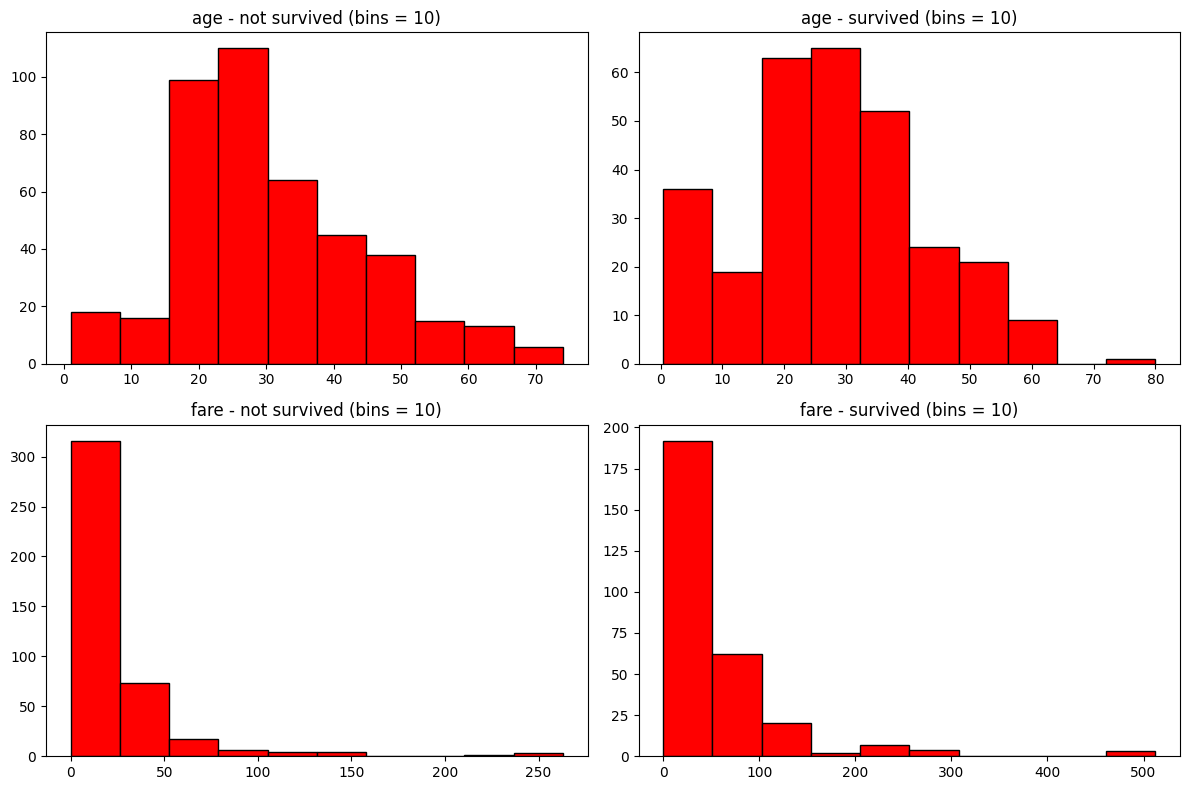

In [3]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados[["age", "fare", "survived"]].dropna()
dados["survived"] = dados["survived"].map({0: "not survived", 1: "survived"})

#Definição de Classes e Features
classes = ["not survived", "survived"]
features = ["age", "fare"]

fig, matriz = plt.subplots(2, 2, figsize = (12, 8))

for i, feat in enumerate(features):
  for j, classe in enumerate(classes):
    dadosFinais = dados[dados["survived"] == classe][feat]
    matriz[i][j].hist(dadosFinais, bins=10, color="red", edgecolor="black")
    matriz[i][j].set_title(f"{feat} - {classe} (bins = 10)")

plt.tight_layout()
plt.show()

* No primeiro eu usei 10 bins, que servem para ter uma visão mais geral dos dados. Com essa quantidade, dá para perceber padrões mais amplos, como faixas de idade mais presentes em cada classe ou os valores médios de tarifa. A visualização fica mais simples, mesmo que a gente perca alguns detalhes.

###Histograma 2 (30 bins):

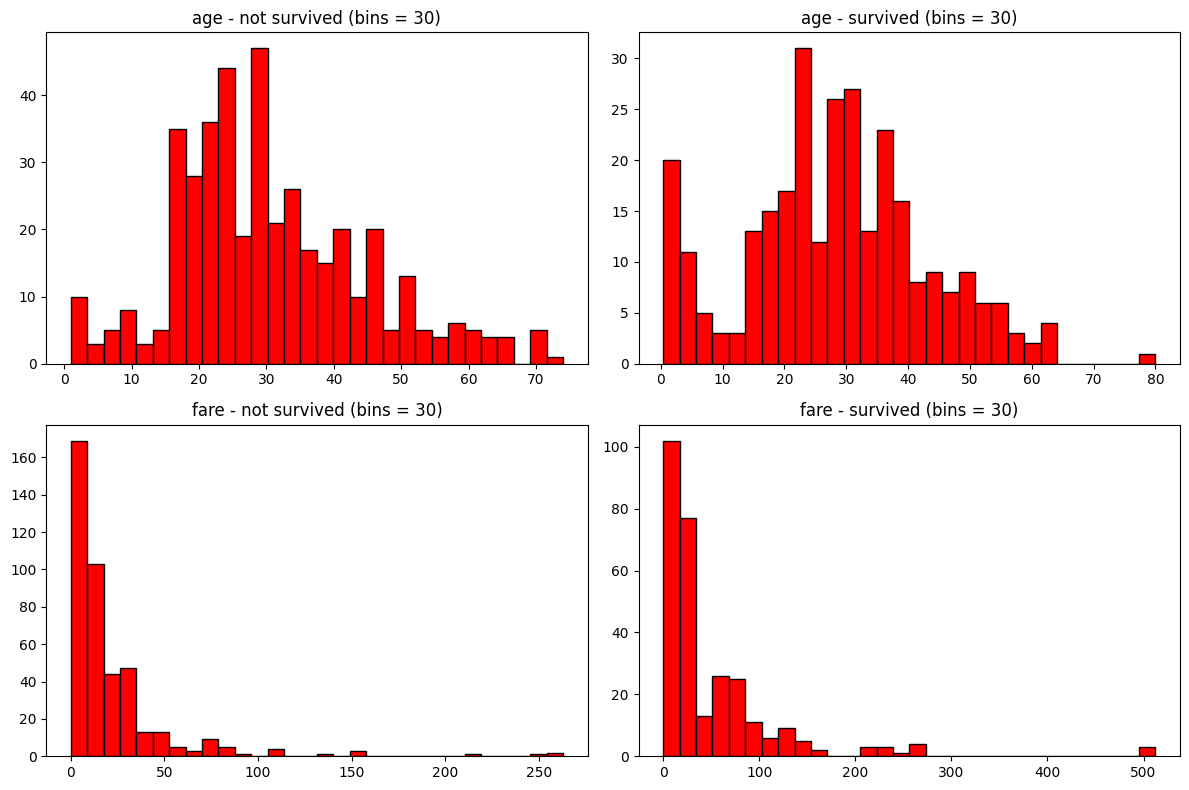

In [5]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados[["age", "fare", "survived"]].dropna()
dados["survived"] = dados["survived"].map({0: "not survived", 1: "survived"})

#Definição de Classes e Features
classes = ["not survived", "survived"]
features = ["age", "fare"]

fig, matriz = plt.subplots(2, 2, figsize = (12, 8))

for i, feat in enumerate(features):
  for j, classe in enumerate(classes):
    dadosFinais = dados[dados["survived"] == classe][feat]
    matriz[i][j].hist(dadosFinais, bins=30, color="red", edgecolor="black")
    matriz[i][j].set_title(f"{feat} - {classe} (bins = 30)")

plt.tight_layout()
plt.show()

* No segundo histograma eu usei 30 bins, para deixar mais detalhado e enxergar melhor certas regiões do gráfico. Nesse caso, algumas diferenças aparecem mais claramente, mas o gráfico também fica mais “picado”. Ou seja, quando a gente aumenta muito a quantidade de bins, acaba ficando mais difícil interpretar, porque pode aparecer muito ruído e detalhes que nem sempre significam alguma coisa.

* Pensando em aprendizado de máquina, os histogramas ajudam a perceber se essas duas variáveis realmente diferenciam as classes. Por exemplo, em “fare” dá para ver que os passageiros que pagaram valores mais altos geralmente sobreviveram mais, então essa feature pode ser útil num modelo de classificação. Já idade parece mais parecida entre as duas classes, então talvez não seja tão forte isoladamente.

##B: Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho. Use uma função de Python e uma tabela para obter os valores de probabilidade.


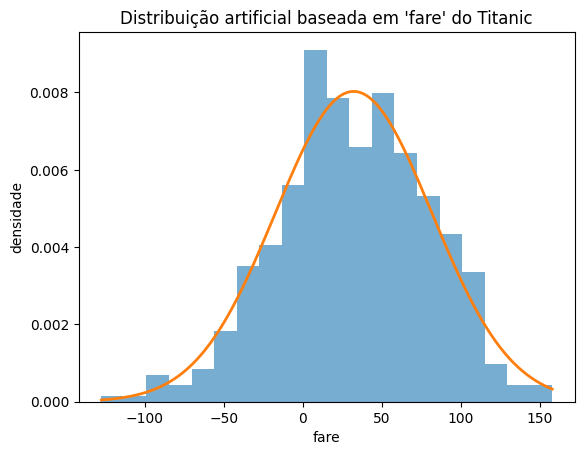

In [6]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados["fare"].dropna()

#Calcular média e desvio padrão
media = dados.mean()
sigma = dados.std()

#Gerando valores artificiais com base nos valores reais
dadosArtificiais = np.random.normal(media, sigma, 500)

#Histograma
plt.hist(dadosArtificiais, bins=20, density=True, alpha=0.6)
x = np.linspace(min(dadosArtificiais), max(dadosArtificiais), 200)
pdf = norm.pdf(x, media, sigma)
plt.plot(x, pdf, linewidth=2)

plt.title("Distribuição artificial baseada em 'fare' do Titanic")
plt.xlabel("fare")
plt.ylabel("densidade")
plt.show()